#### Jupyter Notebook to scrape kml files from the Forest clearance portal, Ministry of Environment and Forests, India.  
##### This notebook downloads all the files in a single folder. 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
df = pd.read_excel(os. getcwd() + '/RecordsUpto2014.xlsx', index_col=0)
df['year'] = pd.DatetimeIndex(df['DATE_FROM_UA_TO_NODAL']).year

In [3]:
df2 = df.groupby('year')['AREA_APPLIED'].sum()

[Text(0, 0.5, 'Forest area diverted(in ha)'), Text(0.5, 0, 'Year')]

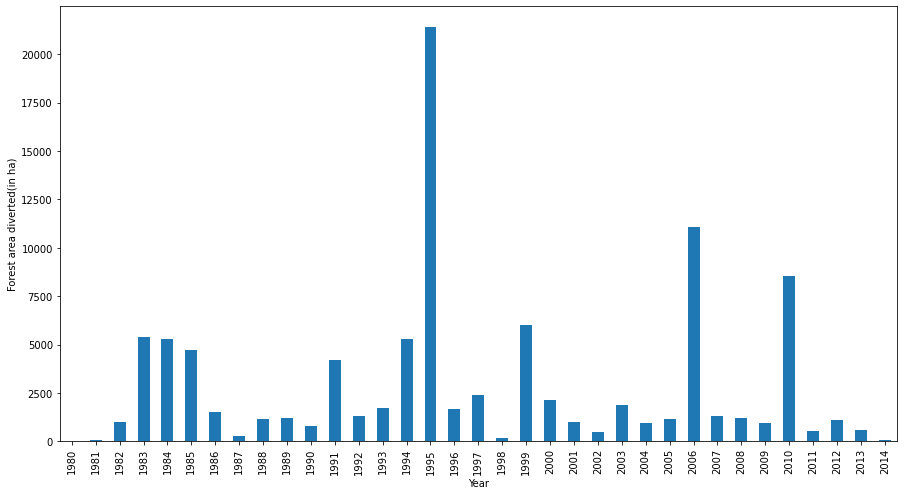

In [4]:
plt.rcParams["figure.figsize"] = [15, 8]
df2.plot.bar(x='year', y='area', rot=90).set(ylabel ="Forest area diverted(in ha)", xlabel = "Year")

In [5]:
# Stacked bar based on category

df.loc[df['CATEGORY'] == 'DISPENSARY/HOSPITAL', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'SCHOOL', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'ENCROACHMENTS', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'REHABILITATION', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'OTHERS', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'HYDEL', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'TRANSMISSION LINE', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'VILLAGE ELECTRICITY', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'WIND POWER', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'IRRIGATION', 'SUMMARY_CAT'] = 'Water' 
df.loc[df['CATEGORY'] == 'DRINKING WATER', 'SUMMARY_CAT'] = 'Water' 
df.loc[df['CATEGORY'] == 'QUARRYING', 'SUMMARY_CAT'] = 'Resource Extraction' 
df.loc[df['CATEGORY'] == 'MINING', 'SUMMARY_CAT'] = 'Resource Extraction' 
df.loc[df['CATEGORY'] == 'ROAD', 'SUMMARY_CAT'] = 'Linear Infrastructure' 
df.loc[df['CATEGORY'] == 'Railway', 'SUMMARY_CAT'] = 'Linear Infrastructure' 

#transpose data for stacked bar
df1 = df.groupby(['year','SUMMARY_CAT'])['AREA_APPLIED'].sum().unstack().fillna(0) 

Text(0.5, 0, 'Year')

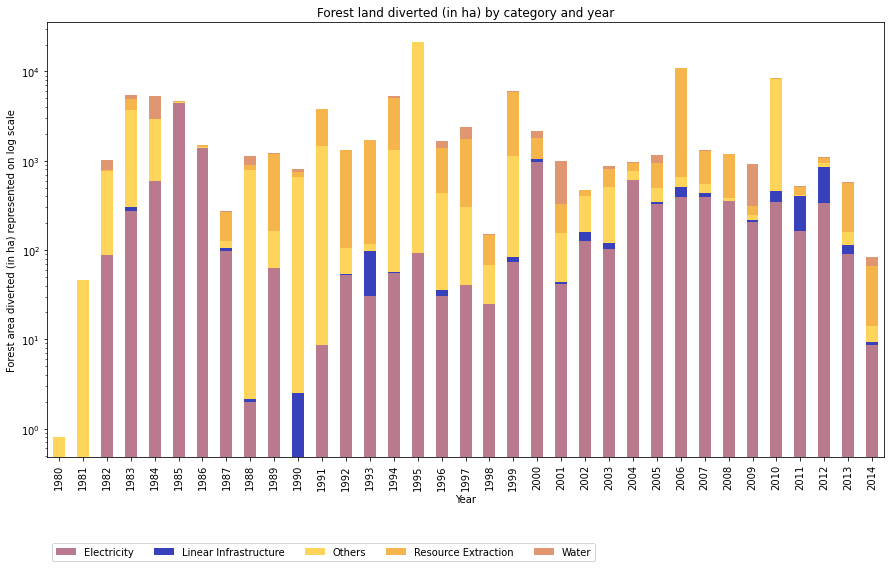

In [14]:
my_colors = list(islice(cycle(['#ba7a8d', '#3940bb', '#ffd45b', '#f6b44d', '#df9671']), None, len(df)))

plt.rcParams["figure.figsize"] = [15, 8]
df1.plot.bar(stacked = True, color=my_colors, log=True)
plt.legend(frameon = True, labelspacing=1, title='', loc="lower left", ncol=5, bbox_to_anchor=(0, -0.25))
plt.title('Forest land diverted (in ha) by category and year')
plt.ylabel("Forest area diverted (in ha) represented on log scale")
plt.xlabel("Year")